# Unsupervised Learning: K-Means Clustering
Author: Neil Ashtekar

 
We'll start by importing the necessary packages and loading our dataset.

In [297]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]
color_ls = ['skyblue', 'green', 'tomato', 'gold', 'indigo', 'khaki', 'pink', 'navy', 'orange', 'grey']

In [298]:
# get dataset
data = pd.read_csv('cluster_data.csv')
X = data.values

Let's visualize our data.

In [299]:
def show_data(show=True):
    """ Plots original data points in black """
    plt.scatter(X[:, 0], X[:, 1], color='black')
    plt.title('Clustering Example Dataset')
    plt.xlabel('X1')
    plt.ylabel('X2')
    if show: plt.show()
    return None

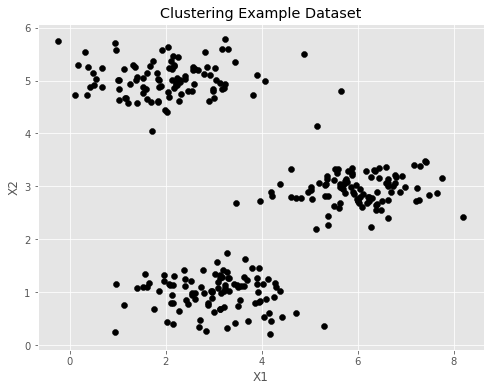

In [300]:
show_data()

Looks like there are 3 clearly defined groupings of points in our dataset. We know what to expect when we perform clustering with k = 3. Let's do it!

In the future, we will make more complex plots. We will create a helper function to make this easier.

In [301]:
def helper_plot(centroids, assignments, colored_points=True):
    """ Makes plots for random_initialization(), cluster_assignments(), and move_centroids() """
    # plot colored centroids
    for i in range(centroids.shape[0]):
        plt.plot(centroids[i][0], centroids[i][1], 
                 color='black', marker='x', ms=20, mew=12)
        plt.plot(centroids[i][0], centroids[i][1], 
                 color=color_ls[i], marker='x', ms=20, mew=10)
    if colored_points:
        # plot colored data points
        for i in range(X.shape[0]):
            plt.scatter(X[i][0], X[i][1], color=color_ls[int(assignments[i])])
        plt.title('Clustering Example Dataset')
        plt.xlabel('X1')
        plt.ylabel('X2')
    # if not plotting all points, plot original data (for random_initialization())
    else:
        show_data(show=False)
    # show everything
    plt.show()
    return None

The k-means clustering algorithm consists of two main steps, repeated:
1. Cluster assignment
2. Move centroids

Basically, we create points to center our clusters, and then adjust their locations to best fit the data. These center points are called centroids. Before we can start, we need to initialize our centroids. Generally, we will use a random intialization.

In [302]:
def random_initialization(k):
    """ Returns k randomly choosen points in X as initial centroids """
    centroid_ls = []
    show_data(show=False)
    # choose k centroids from X randomly by index
    for i in range(k):
        centroid_ls.append(X[np.random.randint(0, X.shape[0])])
    # convert to np array to use np functions later on
    centroid_ls = np.asarray(centroid_ls)
    # plot centroids and return their locations
    helper_plot(centroid_ls, None, colored_points=False)
    return centroid_ls

However, for the purpose of this visualization, we will use a specific initialization. This makes the algorithm more clear.

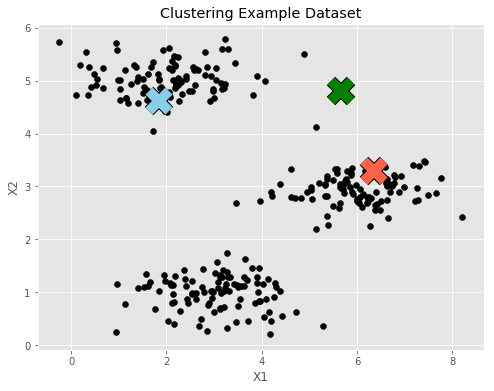

In [303]:
test_centroids = np.array([X[0], X[1], X[2]])
helper_plot(test_centroids, None, colored_points=False)

Now, let's assign our data points to our centroids.

In [304]:
def cluster_assignment(centroids, show=True):
    """ Finds closest centroid for all X, returns array of indices of closest centroids """
    # initialize assignments as invalid, single assignment for each point in X
    assignments = np.full(X.shape[0], np.nan)
    # iterate thru all points in X, assigning each to a centroid
    for i in range(X.shape[0]):
        # find closest centroid to each point, and mark assignment
        min_error = np.inf
        for j in range(centroids.shape[0]):
            instance_error = np.linalg.norm(X[i] - centroids[j]) ** 2
            if instance_error < min_error:
                min_error = instance_error
                assignments[i] = j
    # visualize centroids, all colored points, and return assignments
    if show: helper_plot(centroids, assignments)
    return assignments

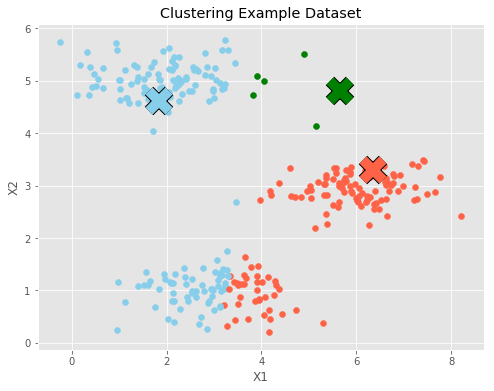

In [305]:
test_assignments = cluster_assignment(test_centroids)

Now, we must move our centroids. 

In [306]:
def move_centroid(centroids, assignments, show=True):
    """ Moves centroids to mean of their matched points, returns new locations """
    # move each centroid to mean location of assigned points
    for i in range(centroids.shape[0]):
        relevant_points = X[np.where(assignments == i)]
        centroids[i] = sum(relevant_points) / len(relevant_points)
    # visualize centroids, all colored points, and return new centroid locations
    if show: helper_plot(centroids, assignments)
    return centroids

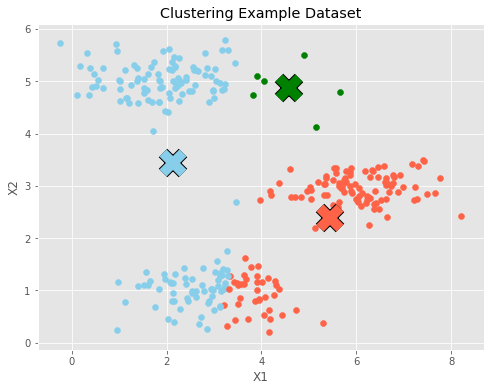

In [307]:
test_centroids = move_centroid(test_centroids, test_assignments)

Now, repeat the process until we get a good clustering! We'll plot the result of both the cluster assignment and move centroid steps to give a clearer view or each iteration.



Iteration 1:


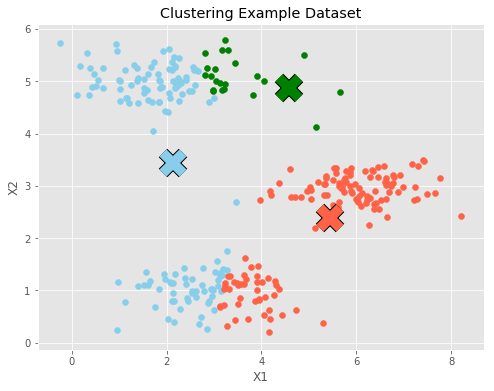



Iteration 2:


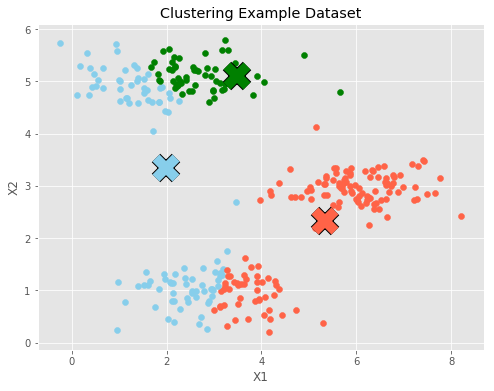



Iteration 3:


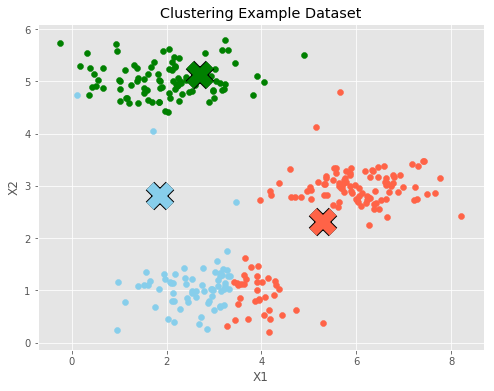



Iteration 4:


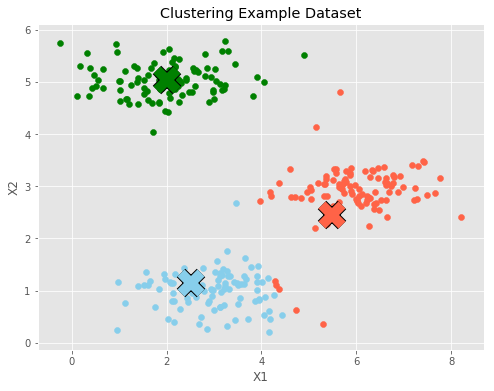



Iteration 5:


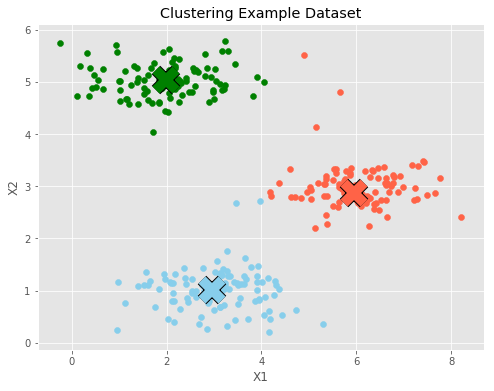



Iteration 6:


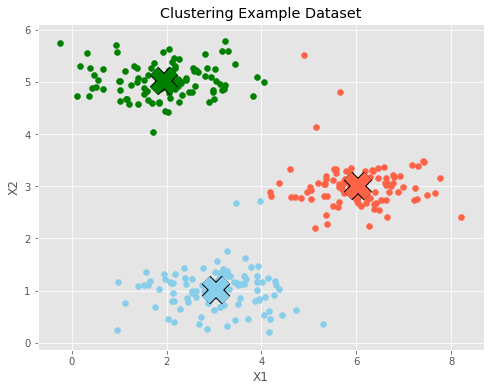



Iteration 7:


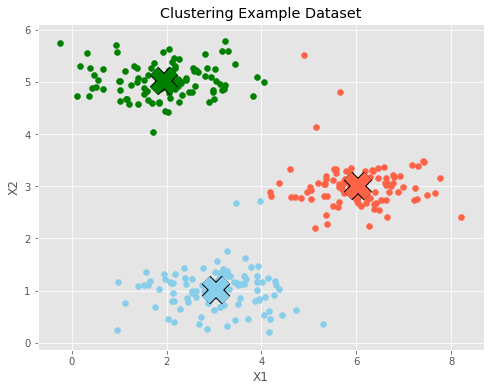



Iteration 8:


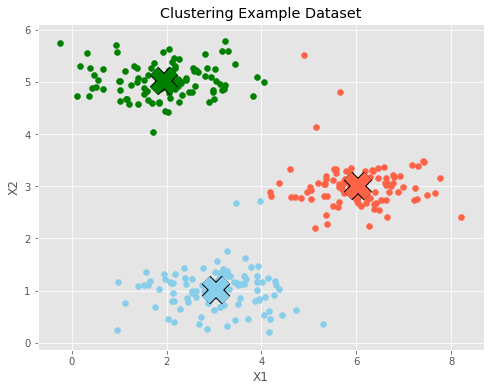



Iteration 9:


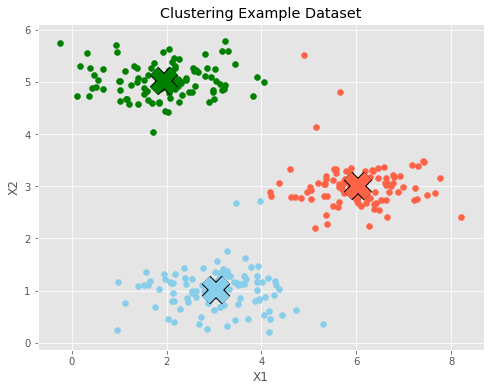



Iteration 10:


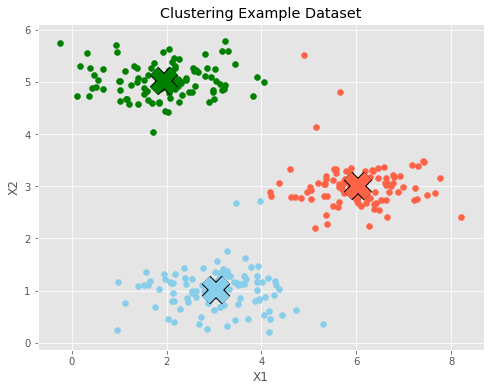

In [308]:
for i in range(10):
    print('\n\nIteration %d:' % (i + 1))
    # show plots after cluster_assignment only -- this ensures proper centroid location
    test_assignments = cluster_assignment(test_centroids, show=True)
    test_centroids = move_centroid(test_centroids, test_assignments, show=False)

The algorithm has converged -- this is our final clustering. Looks Correct!

Now, let's try a clustering on a real-world, less obvious dataset.

In [309]:
# load shirt size dataset
data = pd.read_csv('shirt_sizes.csv')
X = data.values

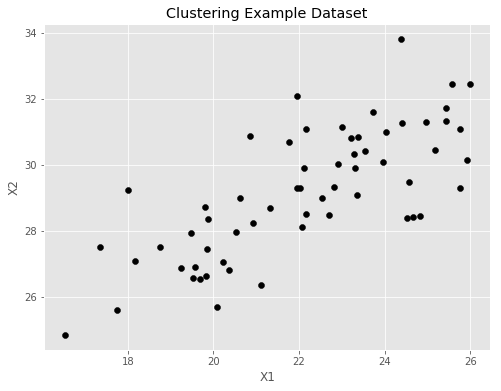

In [310]:
show_data()

We will group our functions together into an all-in-one clustering function.

In [311]:
def cluster(k, iterations=10):
    """ """
    centroids_ = random_initialization(k)
    assignments_ = cluster_assignment(centroids_)
    for i in range(iterations):
        assignments_ = cluster_assignment(centroids_, show=True)
        centroids_ = move_centroid(centroids_, assignments_, show=False) 
    return centroids_, assignments_

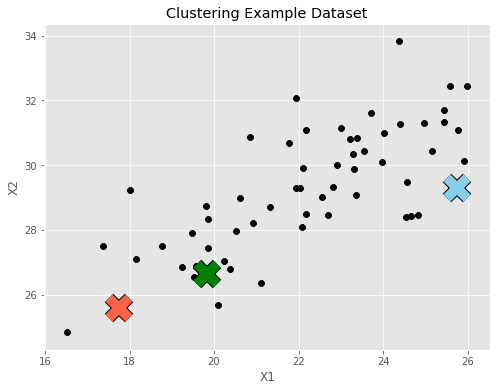

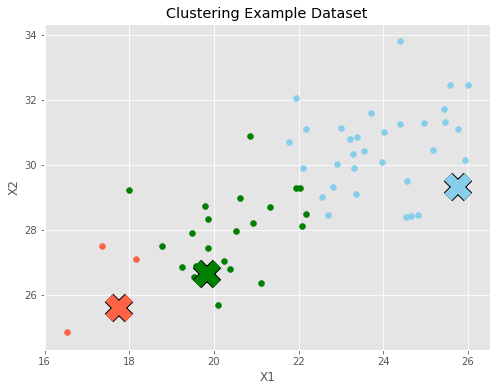

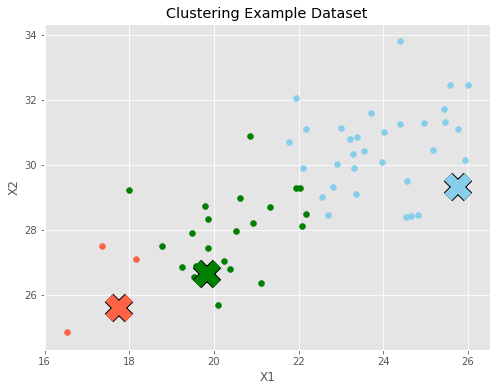

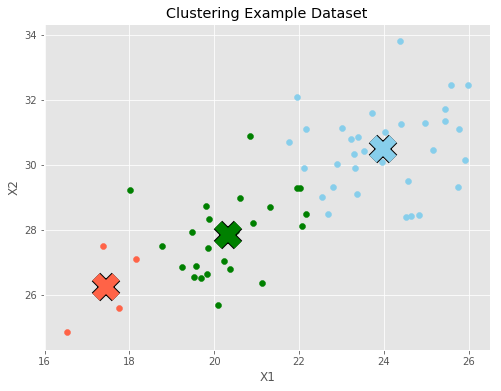

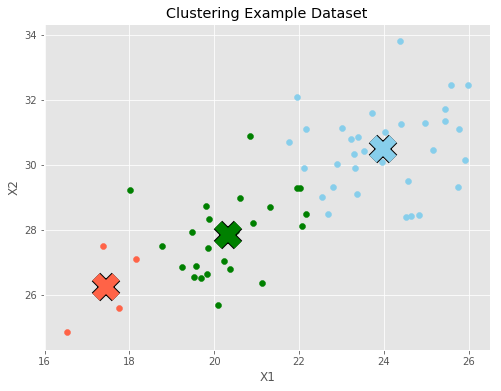

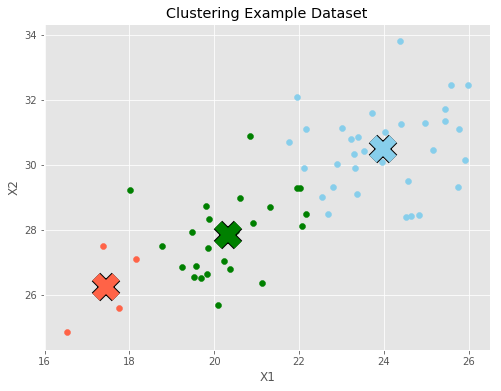

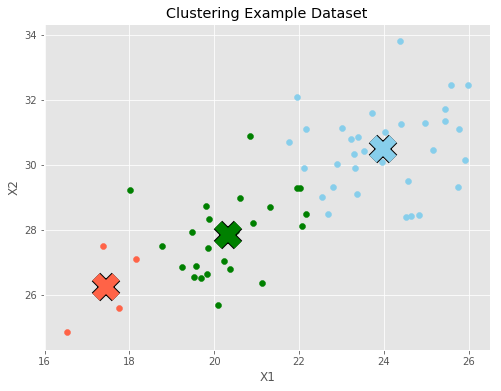

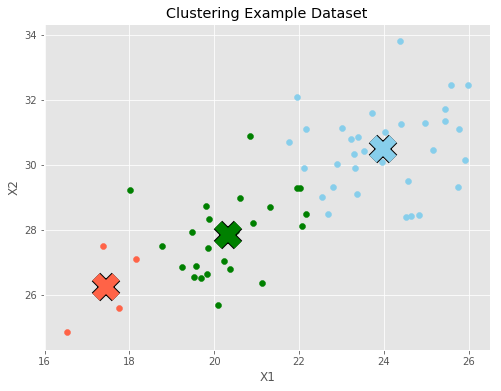

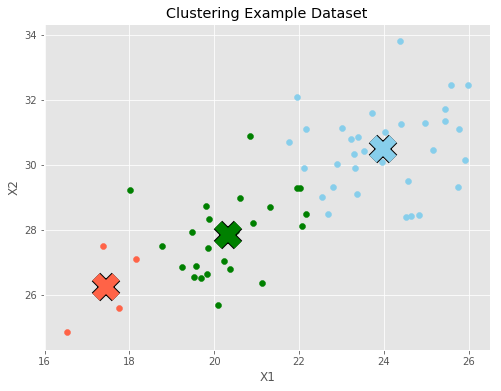

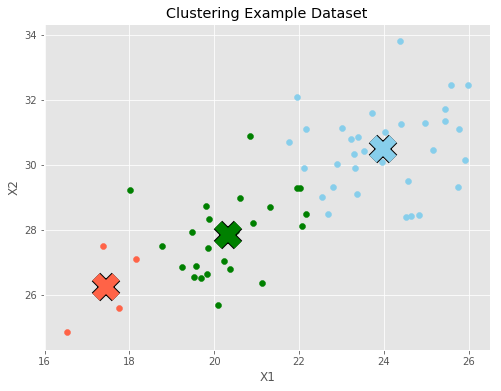

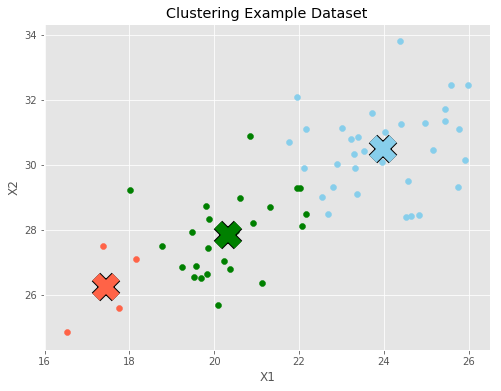

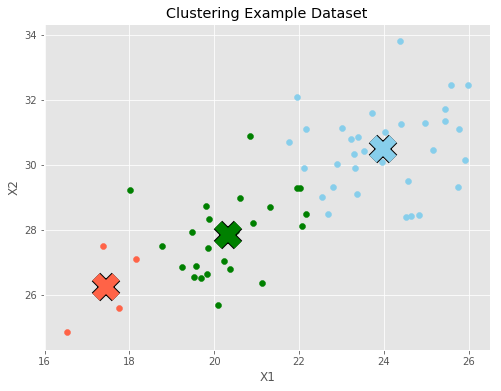

In [312]:
shirt_centroids, shirt_clusters = cluster(3)